In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
data=pd.read_csv('/home/s5ad2/Desktop/AI & DS lab/car_evaluation.csv')
data.head(10)

,buy_price,maint_cost,doors,person,boot_space,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [5]:
for col in data.columns[:-1]:
    le=LabelEncoder()
    data[col]=le.fit_transform(data[col])
    
x=data[['buy_price','maint_cost','doors','person','boot_space','safety']]
y=data['class']
print(x)
print(y)

      buy_price  maint_cost  doors  person  boot_space  safety
0             3           3      0       0           2       1
1             3           3      0       0           2       2
2             3           3      0       0           2       0
3             3           3      0       0           1       1
4             3           3      0       0           1       2
...         ...         ...    ...     ...         ...     ...
1723          1           1      3       2           1       2
1724          1           1      3       2           1       0
1725          1           1      3       2           0       1
1726          1           1      3       2           0       2
1727          1           1      3       2           0       0

[1728 rows x 6 columns]
0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: class, Length: 1728, dtype: object


In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=4)
scalar=StandardScaler()
x_train_std=scalar.fit_transform(x_train)
x_test_std=scalar.transform(x_test)
best_accuracy=0
best_n_components=0
for n_components in range(2,6):
    pca=PCA(n_components=n_components)
    x_train_pca=pca.fit_transform(x_train_std)
    x_test_pca=pca.transform(x_test_std)
    clf=RandomForestClassifier(random_state=42)
    clf.fit(x_train_pca,y_train)
    y_pred=clf.predict(x_test_pca)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"No.of PCA components: {n_components}, Acc:{accuracy}")
if accuracy> best_accuracy:
    best_accuracy= accuracy
    best_n_components=n_components
    print(f"Best number of PCA components: {best_n_components}, Best accuracy: {best_accuracy}")


No.of PCA components: 2, Acc:0.6319845857418112
No.of PCA components: 3, Acc:0.6319845857418112
No.of PCA components: 4, Acc:0.6994219653179191
No.of PCA components: 5, Acc:0.7148362235067437
Best number of PCA components: 5, Best accuracy: 0.7148362235067437


[0.17301111 0.17004327 0.16706188 0.1639962  0.16350708]


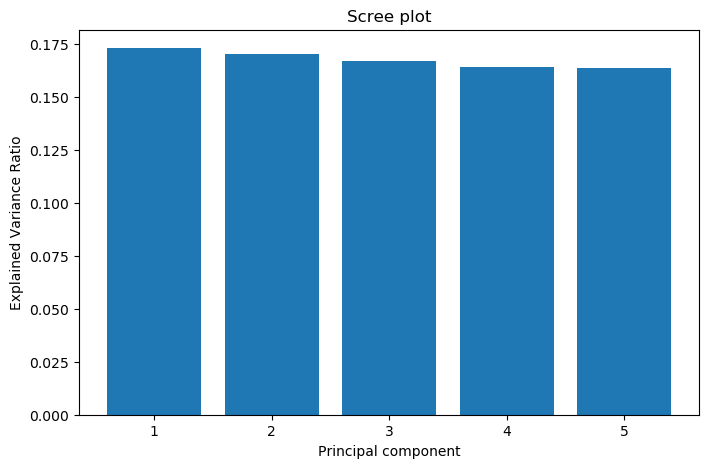

In [15]:
import matplotlib.pyplot as plt
pca.fit(x_train_std)
explained_variance_ratio=pca.explained_variance_ratio_
print(explained_variance_ratio)
plt.figure(figsize=(8,5))
plt.bar(range(1, len(explained_variance_ratio)+1),explained_variance_ratio)
plt.title('Scree plot')
plt.xlabel('Principal component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1,len(explained_variance_ratio)+1))
plt.show()
        

In [16]:
covariance_matrix=np.cov(x_train_std.T)
print("covariance")
print(covariance_matrix)

covariance
[[ 1.00082781e+00 -8.70277629e-03  1.40835094e-02 -7.70402231e-03
  -5.42111645e-03 -1.31899071e-02]
 [-8.70277629e-03  1.00082781e+00 -8.79567279e-03  2.50029223e-02
  -5.65351621e-03 -8.92297474e-04]
 [ 1.40835094e-02 -8.79567279e-03  1.00082781e+00 -6.58637169e-03
   7.15124639e-03 -8.43136089e-03]
 [-7.70402231e-03  2.50029223e-02 -6.58637169e-03  1.00082781e+00
  -8.73432438e-04 -1.86176827e-03]
 [-5.42111645e-03 -5.65351621e-03  7.15124639e-03 -8.73432438e-04
   1.00082781e+00  1.14899310e-02]
 [-1.31899071e-02 -8.92297474e-04 -8.43136089e-03 -1.86176827e-03
   1.14899310e-02  1.00082781e+00]]


 Experiment 9

In [17]:
import pandas as pd
import numpy as np
data=pd.read_csv('/home/s5ad2/Desktop/AI & DS lab/Social_Network_Ads.csv')
data.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


In [18]:
data.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [20]:
data.drop(columns=['User ID'], inplace =True)
data.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
5,Male,27,58000,0
6,Female,27,84000,0
7,Female,32,150000,1
8,Male,25,33000,0
9,Female,35,65000,0


In [23]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Gender']=le.fit_transform(data['Gender'])
x=data[['Gender','Age','EstimatedSalary']]
y=data['Purchased']

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.10,random_state=20)
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)



KNeighborsClassifier()

In [24]:
y_pred=knn.predict(x_test)
from sklearn.metrics import accuracy_score
original_accuracy = accuracy_score(y_test,y_pred)
print(f"Orginal Accuracy: {original_accuracy:.2f}")

Orginal Accuracy: 0.97


In [25]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        26
           1       1.00      0.93      0.96        14

    accuracy                           0.97        40
   macro avg       0.98      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40



In [26]:
correct_predictions =0
wrong_predictions=0
for i in range(len(y_test)):
    if y_test.values[i]== y_pred[i]:
        correct_predictions +=1
    else:
        wrong_predictions +=1
print(f"correct predictions: ",correct_predictions)
print(f"wrong predictions: ",wrong_predictions)

correct predictions:  39
wrong predictions:  1


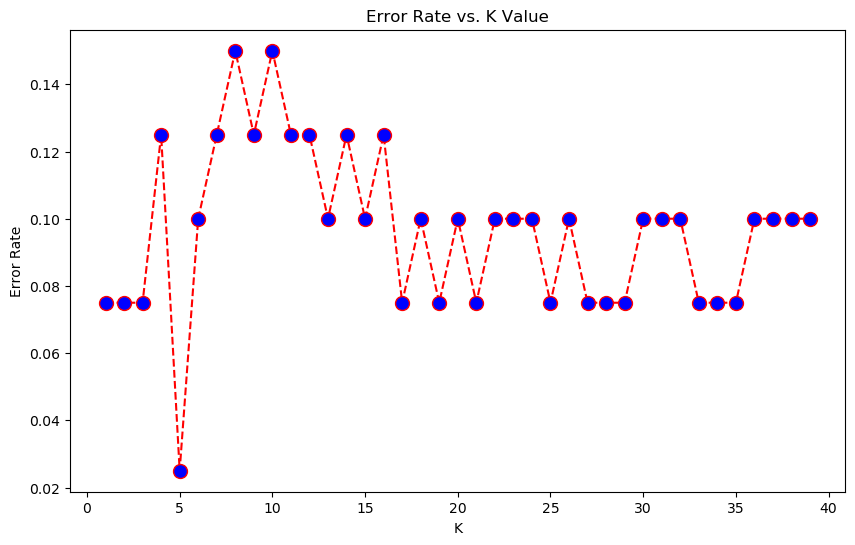

In [28]:
import matplotlib.pyplot as plt
error_rate=[]
k_values=range(1,40)
for k in k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error=1-accuracy_score(y_test,y_pred)
    error_rate.append(error)
plt.figure(figsize=(10,6))
plt.plot(k_values,error_rate,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel("Error Rate")
plt.show()